<h1>Машинное обучение для сети фитнес-центров<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение-" data-toc-modified-id="Введение--1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение <a id="introduction"></a></a></span></li><li><span><a href="#Загрузка-библиотек-и-данных-" data-toc-modified-id="Загрузка-библиотек-и-данных--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка библиотек и данных <a id="open"></a></a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Дендограмма" data-toc-modified-id="Дендограмма-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Дендограмма</a></span></li><li><span><a href="#K-Means" data-toc-modified-id="K-Means-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>K-Means</a></span></li></ul></li><li><span><a href="#Общие-выводы-и-рекомендации" data-toc-modified-id="Общие-выводы-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общие выводы и рекомендации</a></span></li></ul></div>

## Введение <a id="introduction"></a>

Источник данных: датасет с характеристиками клиентов и данными по оттоку.

Цели проекта:
1. Разработать модель прогнозирования оттока клиентов.
2. С помощью ML провести кластеризацию пользователей.

## Загрузка библиотек и данных <a id="open"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

## Исследовательский анализ данных (EDA)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Проверим датасет на наличие дублей.

In [5]:
df.duplicated().sum()

0

Полных дублей нет.

В датасете 4000 наблюдений. Присутствуют все 13 заявленных признаков и целевая переменная `Churn`. Все признаки либо числовые, либо категориальные бинарные, преобразованные в числа 1 и 0. Пропущенных значений в датасете нет.

In [6]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Среднестатистический клиент:
- может быть как мужчиной, так и женщиной;
- живет или работает в районе, где находится фитнес-центр;
- может быть или не быть сотрудником компании-партнёра клуба;
- впервые чаще приходит сам, чем в рамках акции «приведи друга»;
- предоставляет контактный телефон;
- длительность текущего действующего абонемента около 5 месяцев;
- может посещать групповые занятия;
- имеет возраст 29 лет;
- дает суммарную выручку от других услуг фитнес-центра около 147 ед.;
- срок до окончания текущего действующего абонемента - около 4 месяцев;
- впервые обратился в фитнес-центр около 4 месяцев назад;
- в среднем в неделю за все время с начала действия абонемента посещал фитнес-центр около 2 раз;
- в среднем в неделю за предыдущий месяц посещал фитнес центр около 2 раз.

In [7]:
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Попавшие в отток по сравнению с остальными:
- реже живут или работаю в районе от фитнес-центрача;
- реже являются партнерами;
- реже приходят по программе "приведи друга";
- покупают абонементы на меньший срок;
- меньше участвуют в групповых занятиях;
- пришли в фитнес-клуб не так давно;
- имеют абонементы, заканчивающиеся раньше;
- уступают по частоте посещения с начала действия абонемента;
- уступают по частоте посещения в неделю;
- дают меньшую суммарную выручку по другим услугам;
- более молодые.

Положение по всем пунктам ожидаемо, кроме возраста.

In [8]:
def distribution(data):
    for i in df.columns:
        sns_plot = sns.distplot(df[i])
        plt.xlabel('i')
        plt.ylabel('Плотность')
        plt.title('Гистограмма и распределение признака ' + i)
        plt.show()

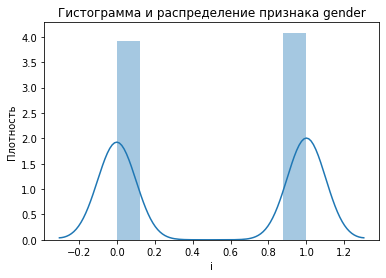

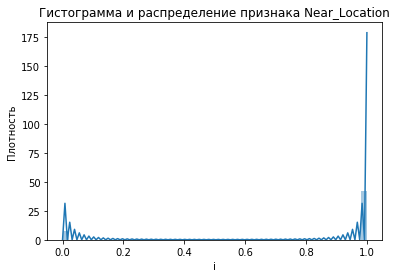

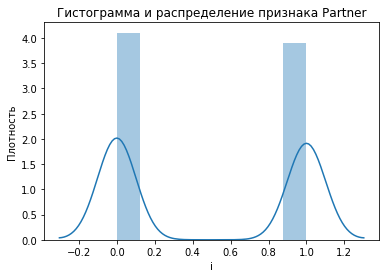

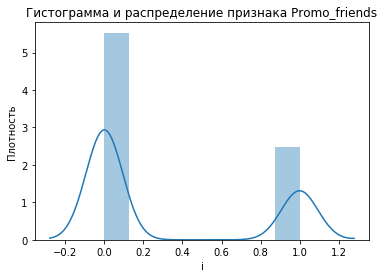

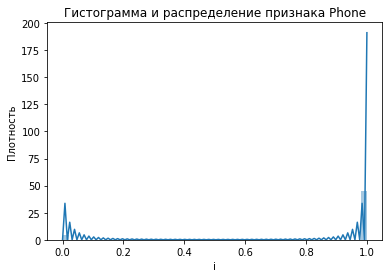

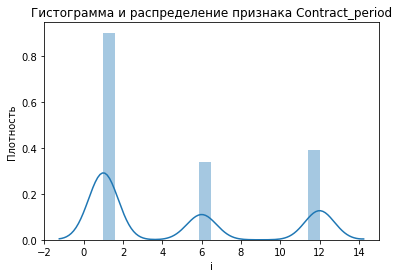

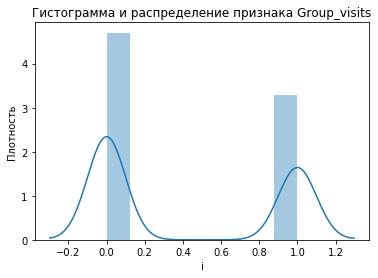

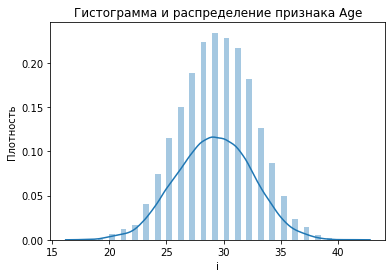

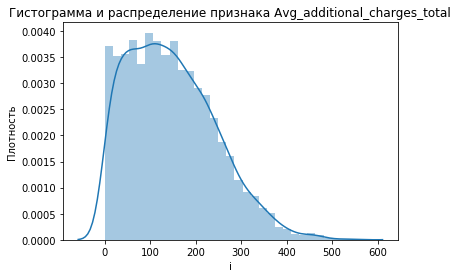

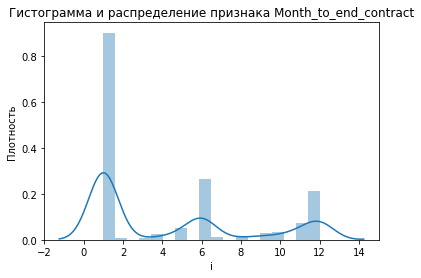

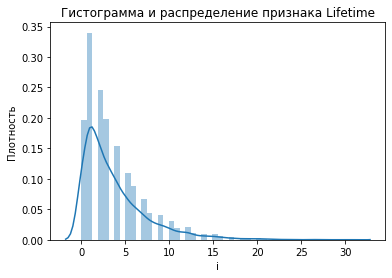

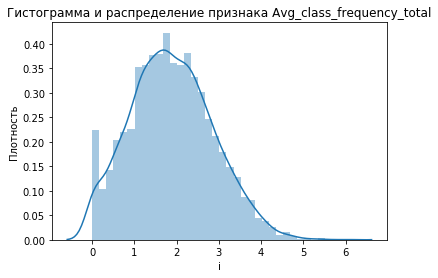

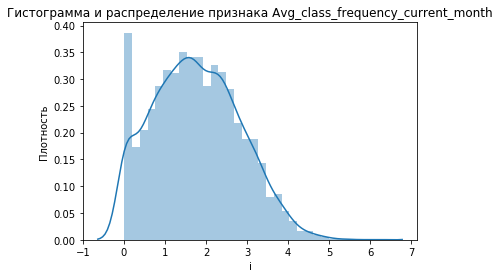

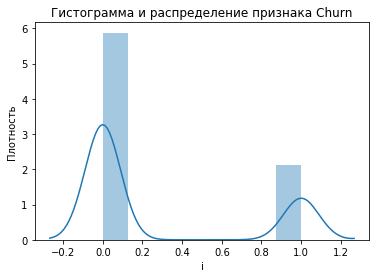

In [9]:
distribution(df)

Из всех признаков только возраст имеет нормальное распределение. Признаки средней частоты посещений близки к нему, но они резко обрываются около 0.

Отмечаем, что нужна стандартизация и нормализация.

**Построим матрицу корреляций.**

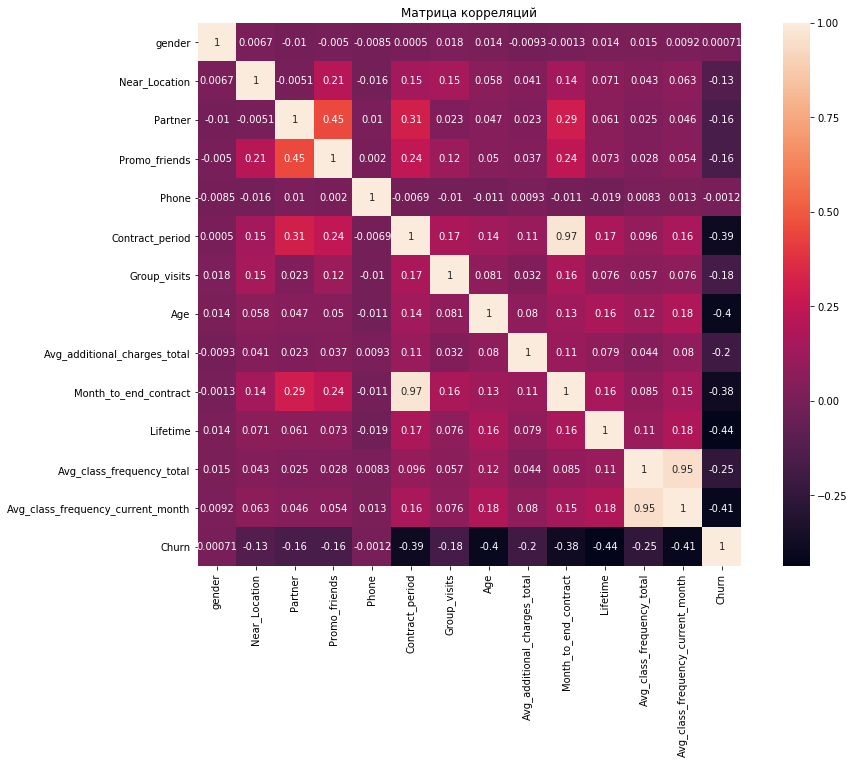

In [10]:
matrix = df.corr() #вычисляем матрицу корреляций
plt.figure(figsize=(15,10))
sns.heatmap(matrix, annot=True, square=True)
plt.title('Матрица корреляций')
plt.show()

Есть две пары мультиколлинеарных признаков (с очень высокой корреляцией, а следовательно зависимых):
- `Month_to_end_contract` и `Contract_period`;
- `Avg_class_frequency_current_month` и `Avg_additional_charges_total`.

Корреляция междя остальными признаками низкая.

## Модель прогнозирования оттока клиентов

Подготовим данные: выделим целевую переменную и снизим размерность датафрейма.

In [11]:
X = df.drop(['Churn', 'Month_to_end_contract', 'Avg_additional_charges_total'], axis=1)
y = df['Churn']

Делим датафрем на тестовую и валидационную выборку.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

Обучаем scaler и одновременно трансформируем матрицу для обучающей выборки. Затем применяем стандартизацию к матрице признаков для тестовой выборки.

In [13]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

Определяем модели.

In [14]:
models = ({LogisticRegression(solver='lbfgs', random_state=0): "Логистическая регрессия",
           RandomForestClassifier(n_estimators = 100, random_state=0): "Случайный лес"})

Создаем функцию для обучения моделей на тестовых данных, тестирования на валидационных данных и расчета метрик.

In [15]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    print('Precision score: {:.2f}, Recall score: {:.2f}, Accuracy score: {:.2f}'.format(precision_score(y_test, y_pred), recall_score(y_test, y_pred), accuracy_score(y_test, y_pred)))

In [16]:
for key, value in models.items():
    print(value)
    make_prediction(key, X_train_st, y_train, X_test_st, y_test)
    print()

Логистическая регрессия
Precision score: 0.89, Recall score: 0.84, Accuracy score: 0.93

Случайный лес
Precision score: 0.88, Recall score: 0.83, Accuracy score: 0.92



Метрики обеих моделей показывают практически идентичные высокие результаты.

Посмотрим важность признаков для логистической регрессии.

In [17]:
model_reg = LogisticRegression(solver='lbfgs', random_state=0)
model_reg.fit(X_train_st, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
df_reg_imp = pd.DataFrame(data = model_reg.coef_, columns = X.columns).T
df_reg_imp.columns = ['LogisticRegression']

In [19]:
df_reg_imp

,LogisticRegression
gender,-0.025415
Near_Location,-0.059397
Partner,-0.056926
Promo_friends,-0.159077
Phone,-0.032813
Contract_period,-1.331193
Group_visits,-0.387205
Age,-1.143489
Lifetime,-3.527713
Avg_class_frequency_total,3.122231


Посмотрим важность признаков для случайного леса.

In [20]:
model_forest =  RandomForestClassifier(n_estimators = 100, random_state=0)
model_forest.fit(X_train_st, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [21]:
df_forest_imp = pd.DataFrame(data = model_forest.feature_importances_, index = X.columns)
df_forest_imp.columns = ['RandomForestClassifier']

Соберем в единый датафрейм важность признаков обех моделей.

In [22]:
imp = df_forest_imp.join(df_reg_imp)

In [23]:
imp.sort_values(by='RandomForestClassifier', ascending=False)

,RandomForestClassifier,LogisticRegression
Lifetime,0.290939,-3.527713
Avg_class_frequency_current_month,0.213426,-4.195352
Avg_class_frequency_total,0.173503,3.122231
Age,0.134423,-1.143489
Contract_period,0.110666,-1.331193
Group_visits,0.018471,-0.387205
Partner,0.014148,-0.056926
gender,0.014020,-0.025415
Promo_friends,0.012391,-0.159077
Near_Location,0.011011,-0.059397


Важность признаков обеих моделей схожа.

Наиболее важными признаками явяются:

- время с момента первого обращения в фитнес-центр;
- средняя частота посещений в неделю за предыдущий месяц;
- суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

Также значимыми являются:
- длительность текущего действующего абонемента;
- возраст.

Влияние остальных признаков значительно ниже. Самый малозначительный - факт наличия контактного телефона.

Проживание или работа в районе, где находится фитнес-центр, вопреки ожиданиям не является значимым признаком для моделей машинного обучения. Но возможно дело в том, что количество клиентов, которые не проживают и не работаю в мест нахождения центра, в принципе невелико.

По итогу, обе модели - и логистическая регрессия, и случайный лес - работают хорошо, но первая из нх немного лучше. Можно выбрать её победителем и использовать для предсказания оттока клиентов.

## Кластеризация клиентов

Обучаем scaler и одновременно трансформируем датасет.

In [24]:
df_clear = df.drop(['Churn'], axis=1)

In [25]:
df_sc = scaler.fit_transform(df_clear)

### Дендограмма

In [26]:
linked = linkage(df_sc, method = 'ward') 

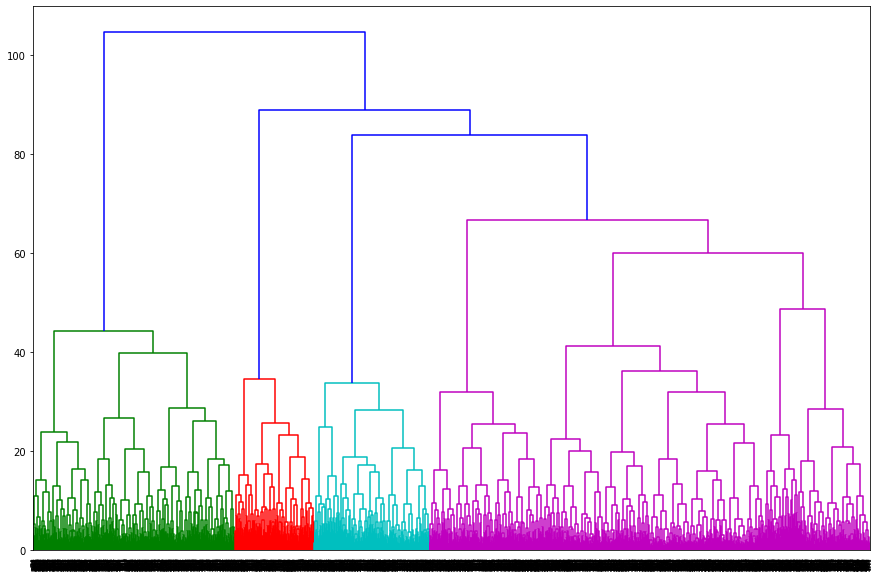

In [27]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Предложенное оптимальное число кластеров равно 4 — четыре разных цвета на графике.

### K-Means

Тем не менее, в соответствии с условием задания определим для модели К-Means 5 кластеров.

In [28]:
km = KMeans(n_clusters = 5, random_state=0)

Применим алгоритм к данным и сформируем вектор кластеров.

In [29]:
labels = km.fit_predict(df_sc)

Сохраним метки кластера в поле датасета.

In [30]:
df['cluster_km'] = labels

Выведем статистику по средним значениям признаков и доле оттока по кластерам.

In [31]:
df_cluster = df.groupby('cluster_km').mean()
df_cluster

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


По социально-демографическим характеристикам (возрасту и полу) все кластеры очень близки: мужчин и женщин примерно одинаковое количество, им около 30 лет. По остальным признакам есть отличия.

Кластер 0

Живут или работают  в месте расположения фитнес-центра. Включает больше всего клиентов от партнеров и один из наибольших процентов клиентов, первоначально пришедших по записи в рамках акции «приведи друга». Оставляют контактный телефон. Длительность текущего абонемента 11 месяцев. Клиенты любят посещение групповых занятий. Приносят одну из наибольших суммарных выручек от всех услуг. Из тех, кто дольше всех посещают фитнес-центр по общему времени и являются одними из лидеров по средней частоте посещений. Минимальный отток - около 3%.


Кластер 1

Живут или работают  в месте расположения фитнес-центра. Около половины являютя сотрудниками фирм-партеров. Среднее количество пришедших по акции среди всех кластеров. Не осталяют контактного телефона. Длительность текущего абонемента 5 месяцев, второй показатель. По всем остальным параметрам середнячки. В отток уходит около 27%.


Кластер 2

Абсолютно все живут и работают не в месте расположения фитнес-центра. Около половины - партнеры. Минимальное количество клиентов, пришедших по акции. Оставляют контактный телефон. Длительность текущего абонемента 2 месяца. Не любят групповые занятия. По суммарной выручке, времени с момента первого обращения в фитнес-центр и частоте посещений показыают средние значение. Пришли в фитнес-центр около 3 месяцев назад. Склонны к оттоку - 44%.


Кластер 3

Абсолютно все живут и работают в месте расположения фитнес-центра. Партнеров относительно немного. Количество клиентов, пришедших по акции на низком уровне. Оставляют контактный телефон. Длительность текущего действующего абонемента минимальная - 2 месяца. Не очень любят груповые занятия. Приносят суммарную выручку меньше остальных кластеров. Минимальное время с момента первого обращения в фитнес-центр - 2 месяца. Имеют минимальную частоту посещений. Больше остальных уходят в отток - около 51%.


Кластер 4

В основном живут и работают в месте расположения фитнес-центра. Часть клиентов пользуется услугами на партнерских условиях. Небольшее количество пришедших по акции "приведи друга". Оставляют контактный телефон. Имеют абонементы в среднем на 3 месяца. Любят групповые занятия. Приносят наибольшую выручку. Имеют наибольшее время с момента первого обращения в фитнес-центр - около 5 месяцев. Ходят на занятие чаще всех. В отток уходит только около 7%.

Важность признаков в моделях машинного обучения в целом сочетается с признаками, по которым делятся кластеры, и с показателем оттока.

Построим распределения признаков для каждого кластера.

Признак gender


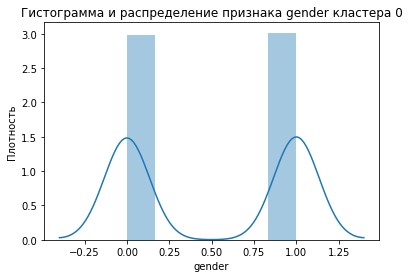

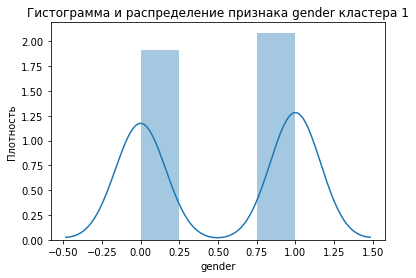

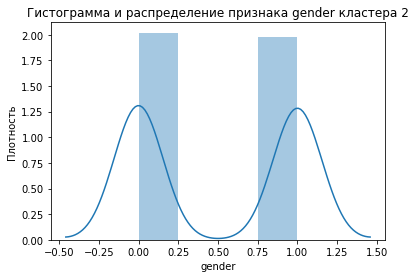

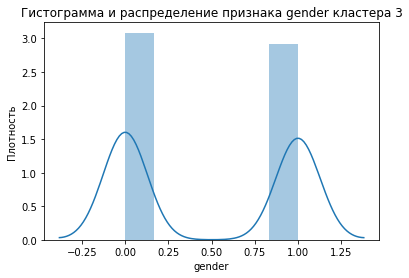

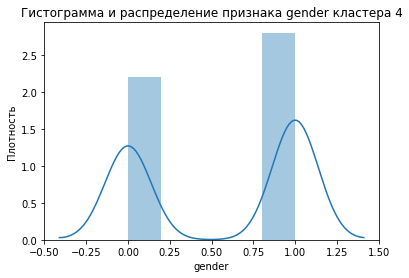

Признак Near_Location


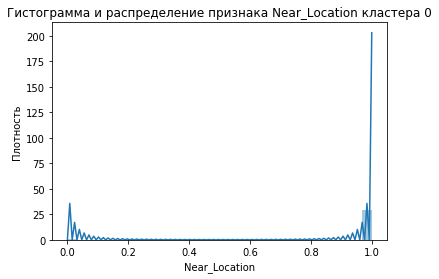

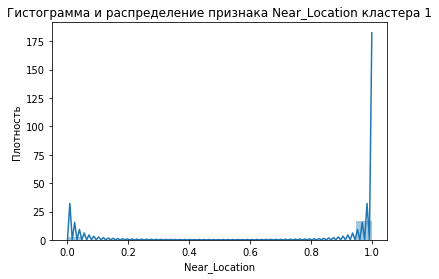

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


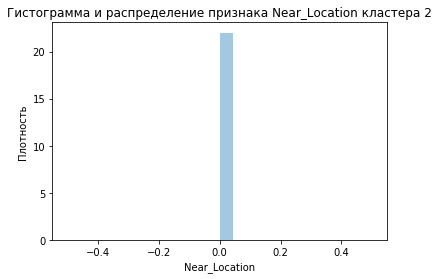

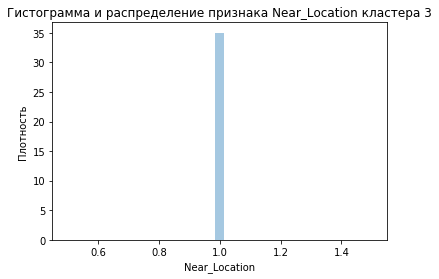

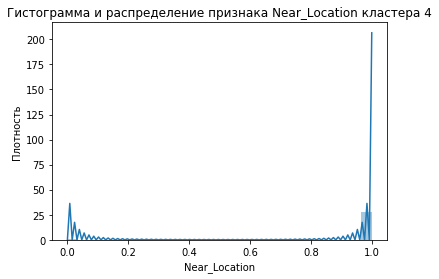

Признак Partner


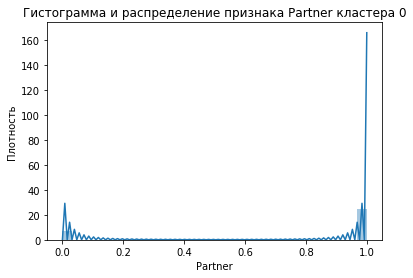

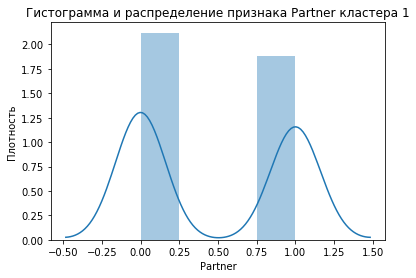

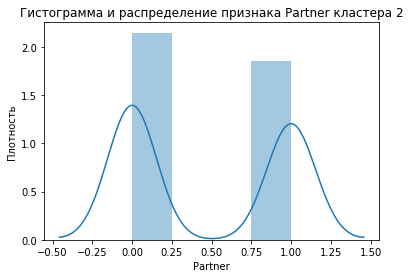

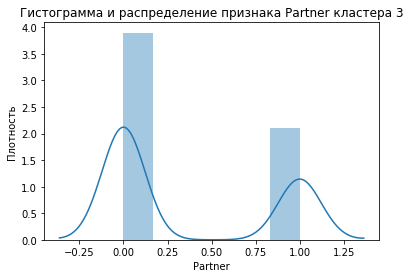

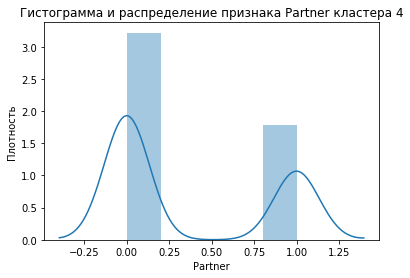

Признак Promo_friends


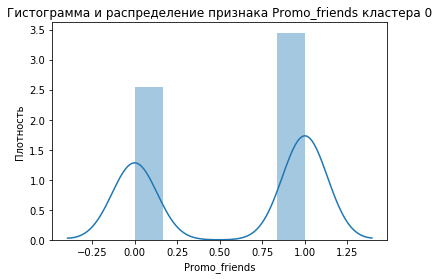

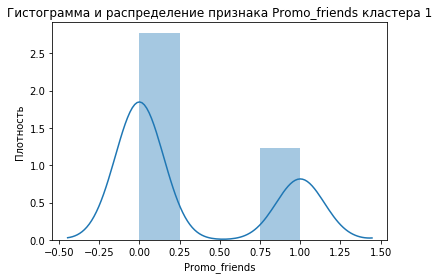

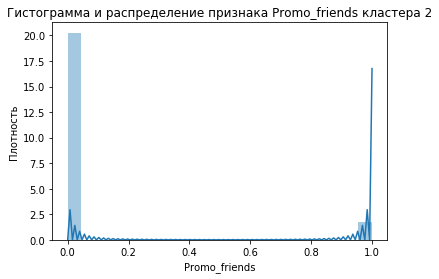

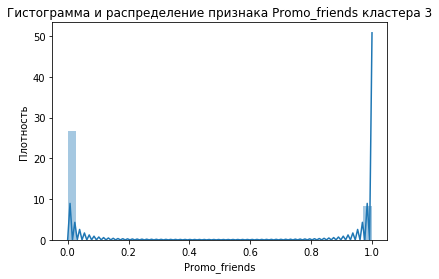

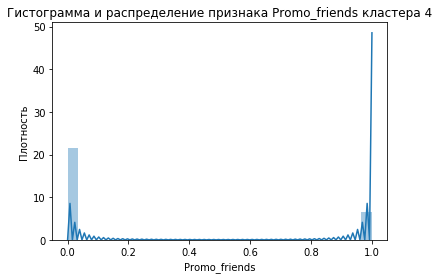

Признак Phone


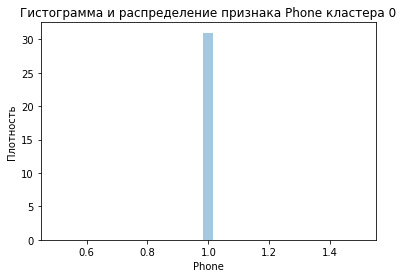

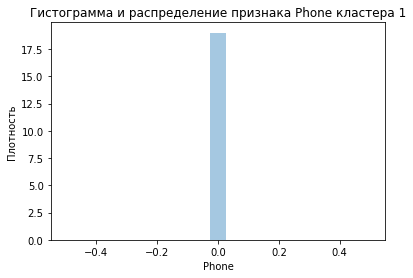

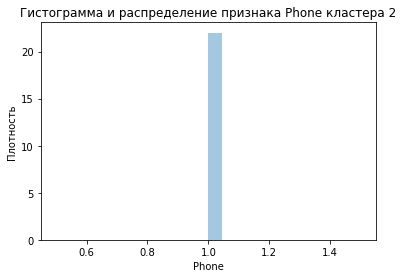

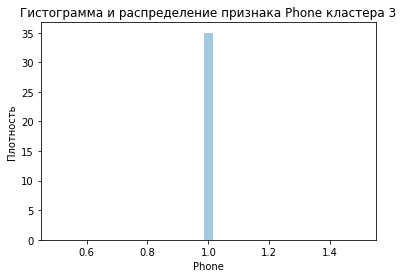

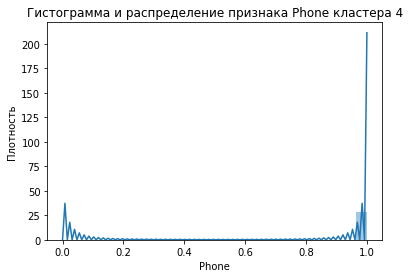

Признак Contract_period


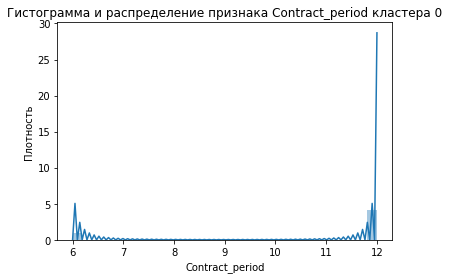

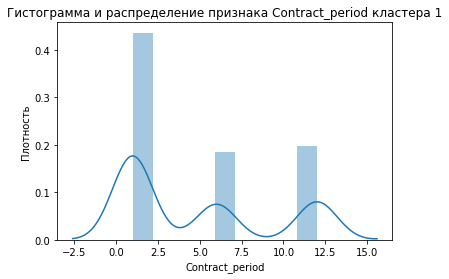

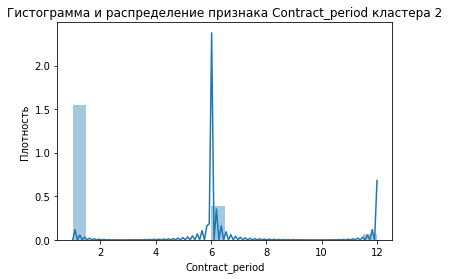

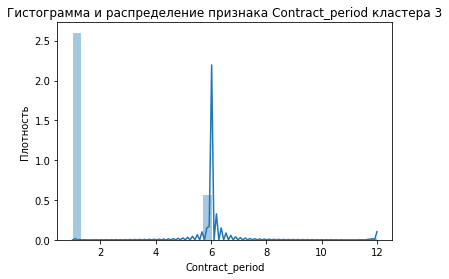

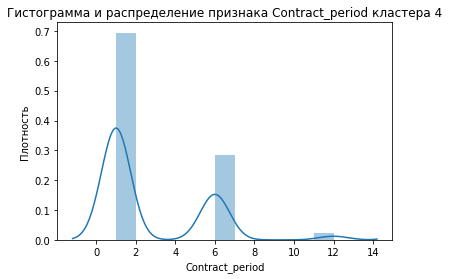

Признак Group_visits


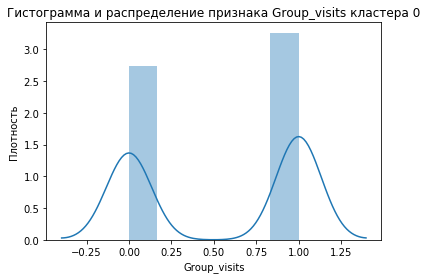

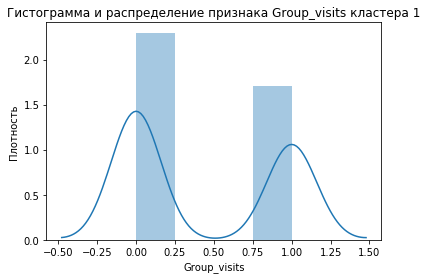

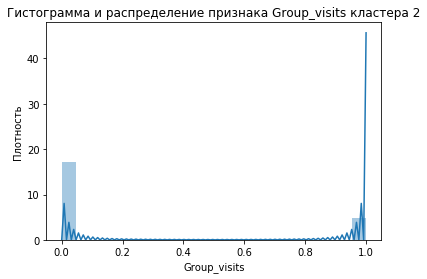

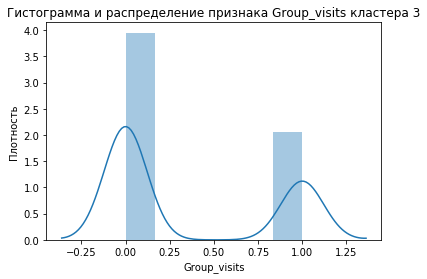

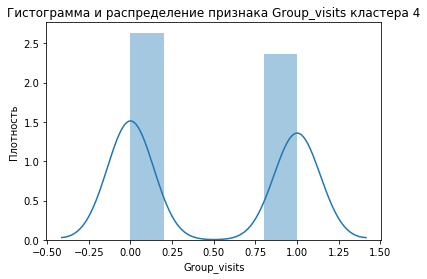

Признак Age


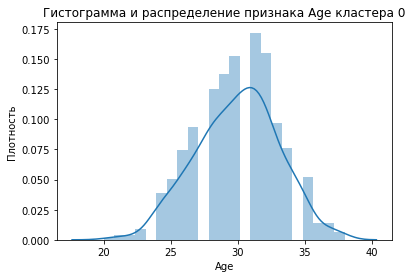

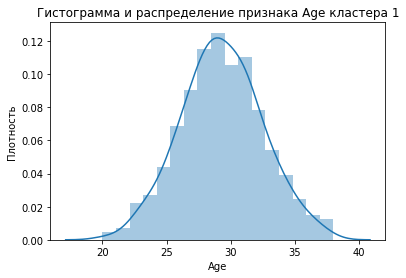

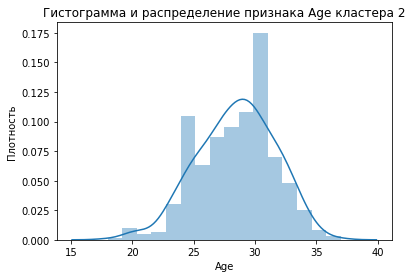

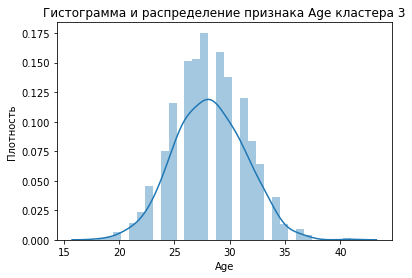

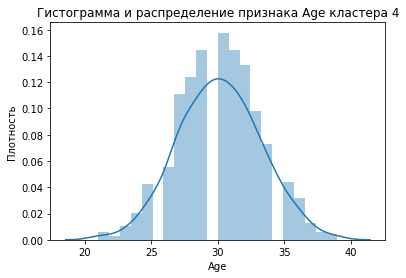

Признак Avg_additional_charges_total


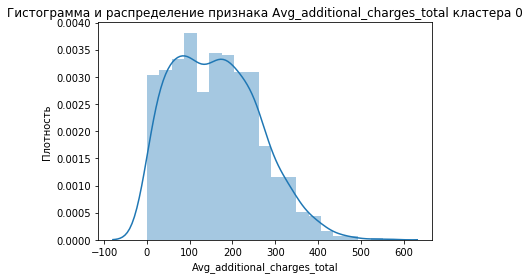

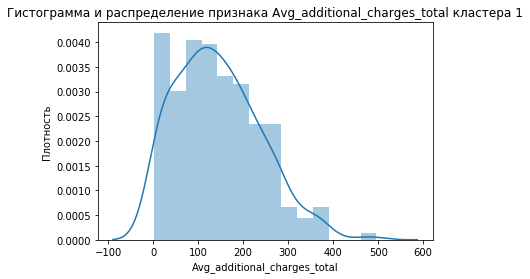

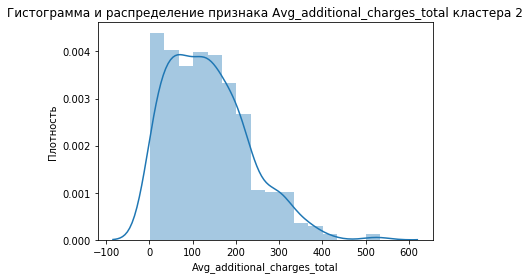

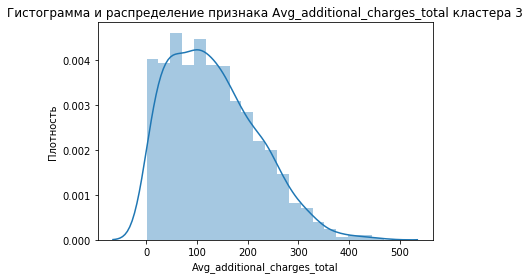

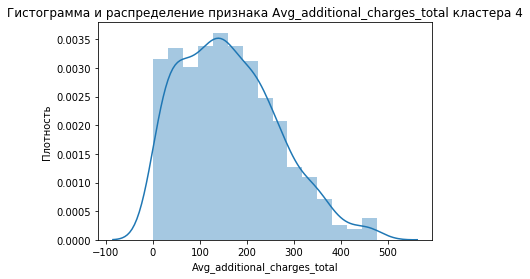

Признак Month_to_end_contract


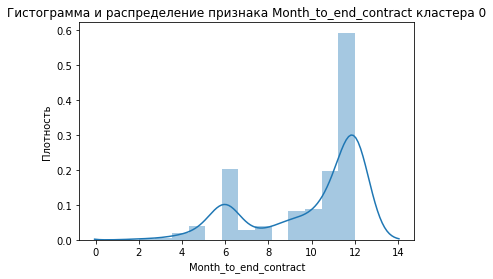

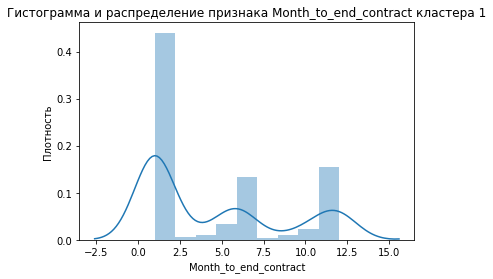

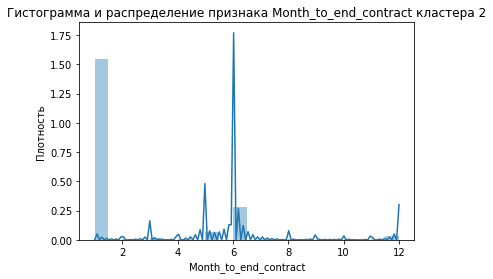

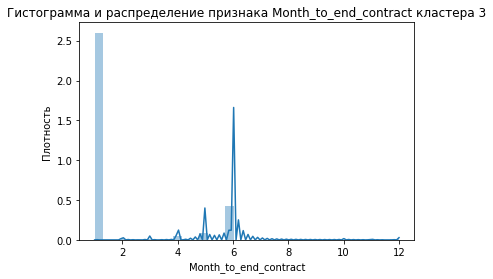

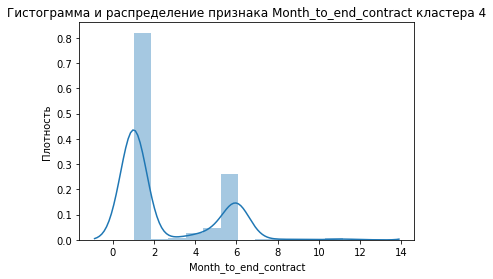

Признак Lifetime


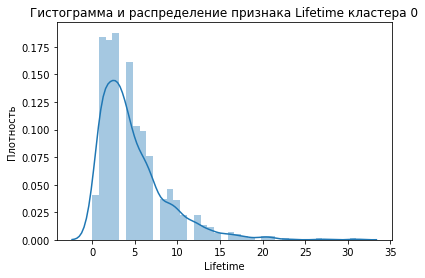

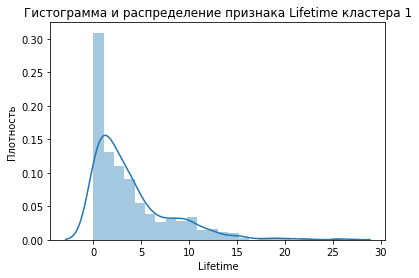

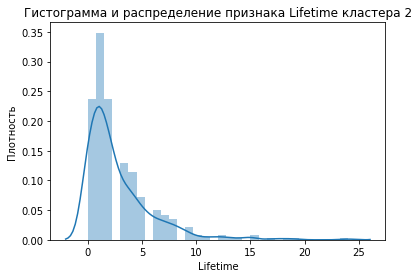

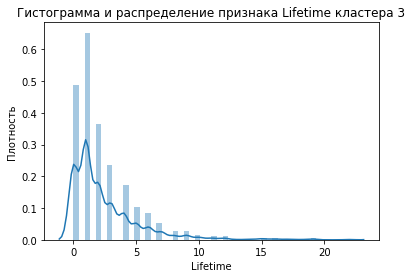

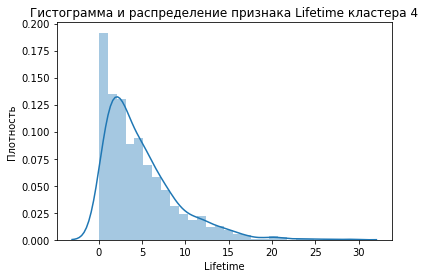

Признак Avg_class_frequency_total


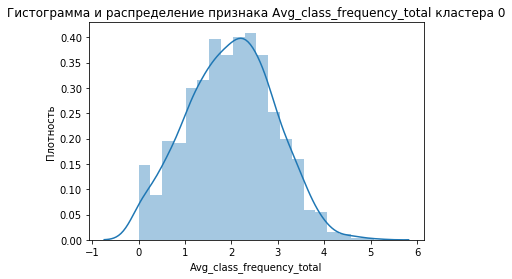

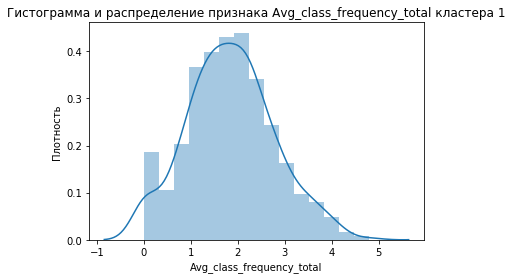

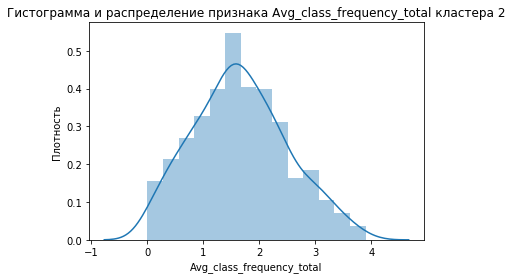

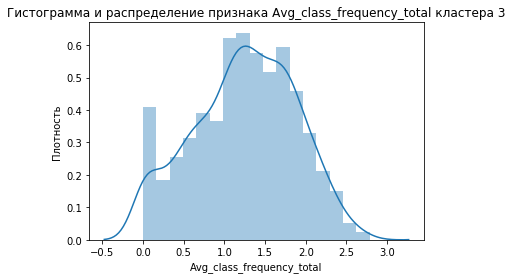

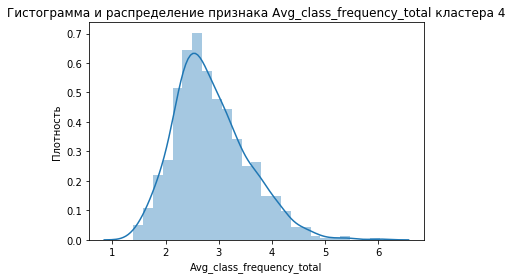

Признак Avg_class_frequency_current_month


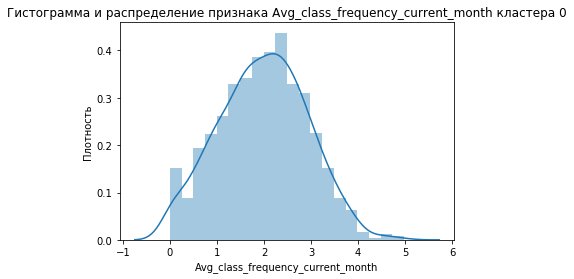

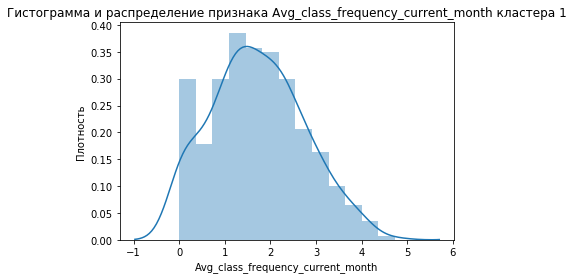

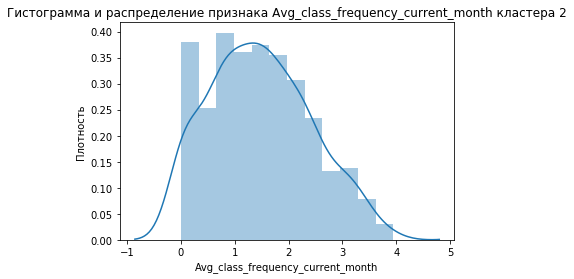

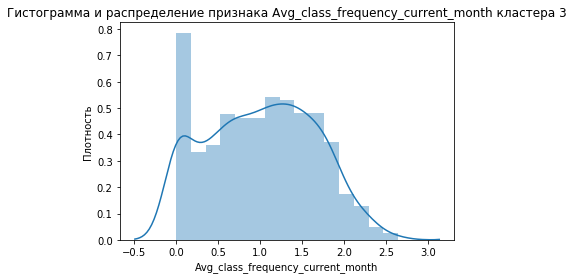

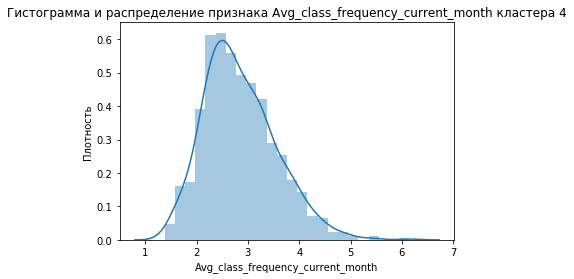

Признак Churn


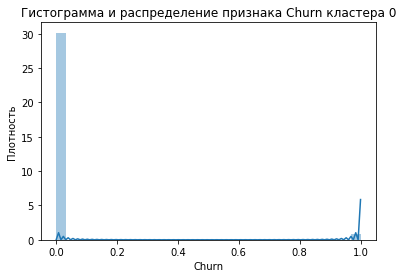

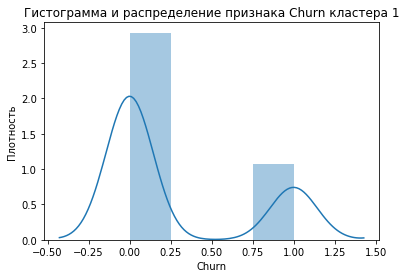

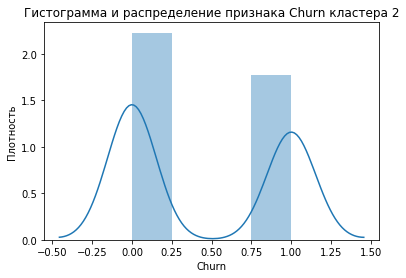

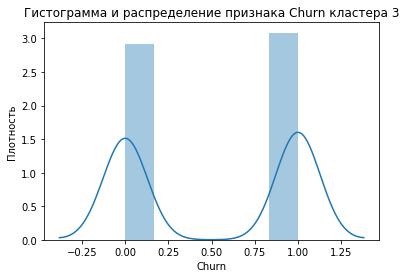

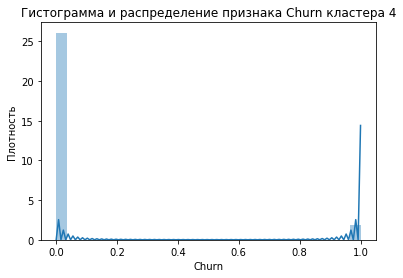

Признак cluster_km


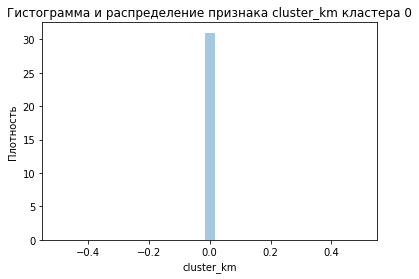

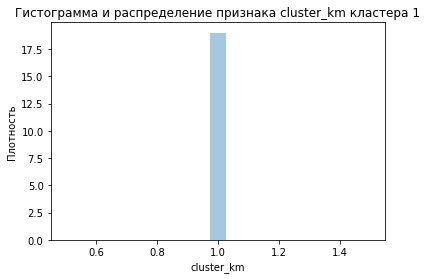

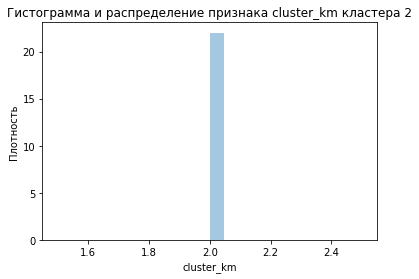

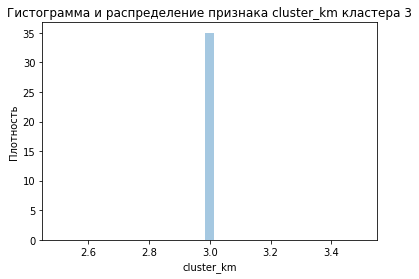

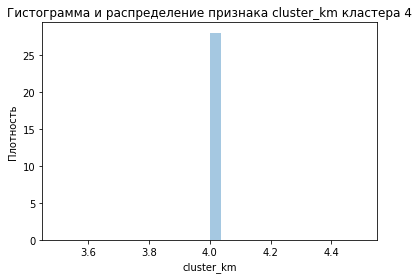

In [32]:
for column in df.columns:
    print('Признак', column)
    for cluster in df['cluster_km'].sort_values().unique():
        df_x = df[df['cluster_km'] == cluster]
        sns_plot = sns.distplot(df_x[column])
        plt.xlabel(column)
        plt.ylabel('Плотность')
        plt.title('Гистограмма и распределение признака ' + column + ' кластера ' + str(cluster))
        plt.show()

В гистограммах и распределениях есть отличия для разных кластеров в одних и тех же признаках. Но не сказал бы, что увидел что-то экстраординарное, что меняло бы результаты анализа средних значений по кластерам.

## Общие выводы и рекомендации

1. Подготовлены две модели машинного обучения для прогнозирования вероятности оттока (на уровне следующего месяца) для каждого клиента.



2. Всех пользователей поделили на 5 кластеров. 


3. Наиболее сильно влияющими на отток признаками являются:


- время с момента первого обращения в фитнес-центр;
- средняя частота посещений в неделю за предыдущий месяц;
- суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

Также значимыми являются:
- длительность текущего действующего абонемента;
- возраст.

Влияние остальных признаков значительно ниже. Самый малозначительный - факт наличия контактного телефона.

4. Рекомендации:


4.1 Стремиться к улучшению ситуации по тем признакам, которые в большей степени влияют на отток.
Например, активнее предлагать дополнительные услуги и стимулировать покупать абонементы с более частыми посещениями на большее количество месяцев.


4.2 Не вкладывать много ресурсов в неважные признаки. Например, признак партнерства не так уж и влияет на удержание клиентов, поэтому не стоит тратить большие ресурсы на расширение базы партнеров, которые в итоге уйдут.


4.3 Подготовить индивидуальные предложения-пакеты услуг для каждого кластера клиентов, учитывающие их потребности и предпочтения. Например, в зависимости от времени общего пользования услугами фитнес-центра, можно предлагать определенную скидку на услуги.


5. Идеи для удержания


5.1 Введение бонусной программы, предоставляющей скидки постоянным клиентам. Повышение лояльности.


5.2 Добавление в зал бесплатного инструктора, который составит программу и подскажет, как заниматься правильно. Помощь в обучении.


5.3 Добавление возможности продлить свой абонемент, если не получилось придти на одно или несколько плановых занятий. Повышение лояльности.
